# **LAB: Linear Regression - Polynomial Regression**
**Estimated time**: 30 minutes

## **Objectives**
After completing this lab, you will be able to:

- Develop **Linear Regression** and **Polynomial Regression** models

## **Overview**
In this section, we will develop two types of models—**Linear Regression** and **Polynomial Regression**—to predict the price of a car using different variables or features. These models will provide an estimate, helping us get an objective idea of how much a car should cost.

### **Some key questions to consider in this lab:**
- Is the dealer offering a fair trade-in value for my car?
- Am I placing a fair value on my car?

In data analytics, **Linear Regression** and **Polynomial Regression** are frequently used to predict future observations based on existing data. These models help us understand the relationships between variables and how these relationships can be used to predict outcomes.

### **Steps**

#### **1. Set up the working environment**
- Import the necessary libraries:



In [ ]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
install.packages("dplyr")
install.packages("ggplot2")
install.packages("scipy")
install.packages("caret")
install.packages("seaborn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘scipy’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)          # Hỗ trợ trong việc xử lý dữ liệu như numpy trong python
library(readr)

# Tắt các cảnh báo
options(warn = -1)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




This function will download the dataset into your browser


In [2]:
# Sử dụng thư viện httr để tải file từ URL
library(httr)

In [3]:
#This function will download the dataset into your browser

download <- function(url, filename) {
  # Gửi yêu cầu GET đến URL
  response <- GET(url)

  # Kiểm tra nếu yêu cầu thành công (status code 200)
  if (status_code(response) == 200) {
    # Ghi nội dung vào tệp tin
    writeBin(content(response, "raw"), filename)
    message("Download successful: ", filename)
  } else {
    message("Download failed with status: ", status_code(response))
  }
}


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


you will need to download the dataset; if you are running locally, please comment out the following


In [4]:
#you will need to download the dataset; if you are running locally, please comment out the following
# Sử dụng download.file để tải xuống tập dữ liệu
download.file(
  url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv",
  destfile = "automobileEDA.csv",
  mode = "wb"
)

# Kiểm tra nếu tệp đã được tải thành công
if (file.exists("automobileEDA.csv")) {
  message("Download successful: automobileEDA.csv")
} else {
  message("Download failed.")
}


Download successful: automobileEDA.csv



Load the data and store it in dataframe `df`:


In [5]:
# Đọc dữ liệu
df <- read.csv("automobileEDA.csv")

# Hiển thị 6 dòng dữ liệu đầu tiên
head(df, 6)


,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,13495,11.190476,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,16500,11.190476,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814,⋯,9.0,154,5000,19,26,16500,12.368421,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486305,⋯,10.0,102,5500,24,30,13950,9.791667,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486305,⋯,8.0,115,5500,18,22,17450,13.055556,Medium,0,1
6,2,122,audi,std,two,sedan,fwd,front,99.8,0.8519942,⋯,8.5,110,5500,19,25,15250,12.368421,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>


# **1. Linear Regression and Multiple Linear Regression**

## **Linear Regression**

One example of a Data Model that we will be using is:

### **Simple Linear Regression**

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (Y), which is what we want to predict.

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

### **Notation**
$$
Y: \text{Response Variable} \\
X: \text{Predictor Variables}
$$

### **Linear Function**
$$
\hat{Y} = a + bX
$$
- **a** refers to the intercept of the regression line, i.e., the value of **Y** when **X** is 0.
- **b** refers to the slope of the regression line, i.e., the change in **Y** when **X** increases by 1 unit.

### Let's load the modules for linear regression and create the linear regression object:




<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


# **Building a Linear Regression Model**

We will create a linear regression model to predict car price based on highway miles per gallon (mpg). After fitting the model, review the summary of the model, which includes key information such as the coefficients, R-squared value, and p-values.

### **Questions for Evaluation:**

1. What is the coefficient for the `highway.mpg` variable? How does it relate to the price of the car?
2. What is the intercept, and what does it represent in the context of the model?
3. How do you interpret the R-squared value? Does the model explain a significant amount of variance in the price?
4. Based on the p-value, is the `highway.mpg` variable statistically significant in predicting car price?
5. What other factors might you consider adding to improve the model's predictive power?


In [7]:
# Create a linear regression model
lm_model <- lm(price ~ highway.mpg, data = df)

# View the summary of the model
summary(lm_model)



Call:
lm(formula = price ~ highway.mpg, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8647  -3411  -1102   1092  20970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38423.31    1843.39   20.84   <2e-16 ***
highway.mpg  -821.73      58.65  -14.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5653 on 199 degrees of freedom
Multiple R-squared:  0.4966,	Adjusted R-squared:  0.4941 
F-statistic: 196.3 on 1 and 199 DF,  p-value: < 2.2e-16


### **Questions for Evaluation:**

1. What is the coefficient for the `highway.mpg` variable? How does it relate to the price of the car?
2. What is the intercept, and what does it represent in the context of the model?
3. How do you interpret the R-squared value? Does the model explain a significant amount of variance in the price?
4. Based on the p-value, is the `highway.mpg` variable statistically significant in predicting car price?
5. What other factors might you consider adding to improve the model's predictive power?



```
# Complete the question with your answer
```



Fit the linear model using highway-mpg:


We can output a prediction:


In [8]:
# Generate predictions
yhat <- predict(lm_model, df)

# Display the first 5 predicted values
head(yhat, 5)


1        2        3        4        5 
16236.50 16236.50 17058.24 13771.30 20345.17

<h4>What is the value of the intercept (a)?</h4>


In [9]:
# Get the intercept (a)
intercept <- coef(lm_model)[1]
print(paste("Intercept:", intercept))


[1] "Intercept: 38423.3058581573"


<h4>What is the value of the slope (b)?</h4>


In [10]:
# Get the slope (b)
slope <- coef(lm_model)[2]
print(paste("Slope:", slope))


[1] "Slope: -821.733378321925"


In [11]:
# Print the regression equation
cat("Price =", round(intercept, 2), "+", "______", "x highway-mpg\n")


Price = 38423.31 + ______ x highway-mpg


### **What is the final estimated linear model we get?**

After reviewing the model summary, the final estimated linear regression equation can be expressed in the form:

$$
\hat{Y} = a + bX
$$

Where:
- **a** is the intercept (the predicted price when `highway.mpg` is 0).
- **b** is the coefficient of `highway.mpg` (how much the price changes for each unit increase in `highway.mpg`).

### **Questions to consider:**
- Based on the summary, what are the specific values of **a** (intercept) and **b** (slope)?
- How would you describe the relationship between `highway.mpg` and `price` based on these values?


Plugging in the actual values we get:


<b>Price</b> =  38423.31 + -821.73 x highway-mpg</b>






```
# Complete the question with your answer
```





<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>
<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

</div>

</div>


In [12]:
# Create a linear regression model for engine.size
lm_model_engine <- lm(price ~ engine.size, data = df)

# View the summary of the model
summary(lm_model_engine)
# Get the intercept
intercept <- coef(lm_model_engine)[1]

# Get the slope (coefficient for engine.size)
slope <- coef(lm_model_engine)[2]

# Display the regression equation
print(paste("Price = ", intercept, " + ", slope, " * engine.size"))



Call:
lm(formula = price ~ engine.size, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10433.0  -2249.4   -469.8   1370.6  14404.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7963.339    884.835   -9.00   <2e-16 ***
engine.size   166.860      6.629   25.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3895 on 199 degrees of freedom
Multiple R-squared:  0.761,	Adjusted R-squared:  0.7598 
F-statistic: 633.5 on 1 and 199 DF,  p-value: < 2.2e-16


[1] "Price =  -7963.33890628109  +  166.860015691416  * engine.size"


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 b:</h1>

<b>Find the slope and intercept of the model.</b>

</div>


<h4>Slope</h4>


In [14]:
# Fit a linear regression model using engine.size as the predictor
lm1 <- lm(price ~ engine.size, data = df)

# Find the value of the slope (coefficient for engine.size)
slope_engine <- coef(lm1)[2]
slope_engine


engine.size 
     166.86

<h4>Intercept</h4>


In [16]:
# Giá trị của hằng số (intercept)
intercept_engine <- coef(lm1)[1]
intercept_engine


(Intercept) 
  -7963.339

In [18]:
# Find the value of the intercept
intercept_engine <- coef(lm1)[1]

# Print the regression equation
cat("Price =", round(intercept_engine, 2), "+",
    round(slope_engine, 2), "x engine.size\n")


Price = -7963.34 + 166.86 x engine.size


In [20]:
# Calculate the predicted prices
price_predicted <- predict(lm1, df)

# Display the first few predicted values
head(price_predicted)


1        2        3        4        5        6 
13728.46 13728.46 17399.38 10224.40 14729.62 14729.62

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>

</div>


Price = -7963.34 + 166.86 x engine.size


[1] 13728.46 13728.46 17399.38 10224.40 14729.62 14729.62

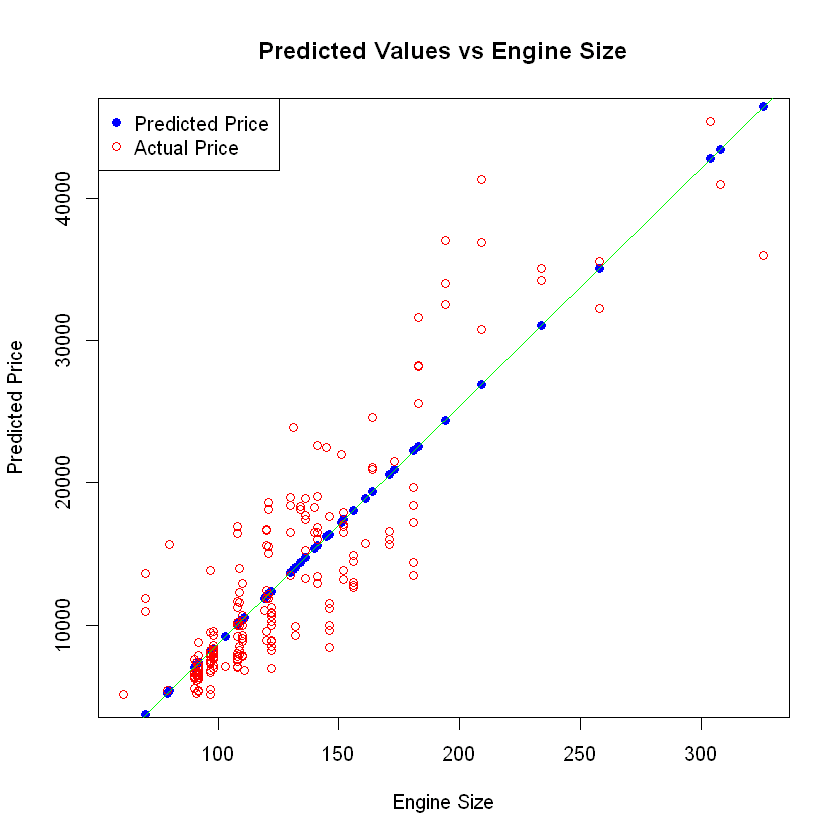

In [32]:
# Fit a linear regression model using engine.size as the predictor
lm1 <- lm(price ~ engine.size, data = df)

# Find the value of the slope and intercept
slope <- coef(lm1)[2]
intercept <- coef(lm1)[1]

# Define X using df$engine.size
X <- df$engine.size  # Fill in this part

# Calculate predictions using X
Yhat <- intercept + slope * X

# Print the prediction equation
cat("Price =", round(intercept, 2), "+", round(slope, 2), "x engine.size\n")

# Check the predicted results
head(Yhat)

# Plot to illustrate with a white background
plot(X, Yhat, main = "Predicted Values vs Engine Size",
     xlab = "Engine Size", ylab = "Predicted Price",
     col = "blue", pch = 19, bg = "white", ylim = range(df$price))
points(df$engine.size, df$price, col = "red", pch = 1)  # Add actual price points
abline(lm1, col = "green")  # Add the regression line
legend("topleft", legend = c("Predicted Price", "Actual Price"), 
       col = c("blue", "red"), pch = c(19, 1))

### **Multiple Linear Regression**

#### **What if we want to predict car price using more than one variable?**

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.

Multiple Linear Regression is similar to Simple Linear Regression, but it explains the relationship between one continuous response (dependent) variable and **two or more** predictor (independent) variables. Most real-world regression models involve multiple predictors. We will demonstrate the structure using four predictor variables, but the results can generalize to any number of predictors:

$$
Y: \text{Response Variable} \\
X_1: \text{Predictor Variable 1} \\
X_2: \text{Predictor Variable 2} \\
X_3: \text{Predictor Variable 3} \\
X_4: \text{Predictor Variable 4}
$$

Where:
- **a**: intercept
- **b₁**: coefficient of Variable 1
- **b₂**: coefficient of Variable 2
- **b₃**: coefficient of Variable 3
- **b₄**: coefficient of Variable 4

The equation for the Multiple Linear Regression model is given by:

$$
\hat{Y} = a + b₁ X₁ + b₂ X₂ + b₃ X₃ + b₄ X₄
$$

#### **Predictors for Car Price**

From the previous analysis, we know that good predictors of car price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictors.



In [33]:
# Tạo mô hình hồi quy đa biến
multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Xem tóm tắt mô hình
summary(multi_model)



Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15806.625   4388.993  -3.601 0.000401 ***
horsepower      53.496     14.727   3.632 0.000358 ***
curb.weight      4.708      1.119   4.207 3.94e-05 ***
engine.size     81.530     14.064   5.797 2.66e-08 ***
highway.mpg     36.057     74.167   0.486 0.627390    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Fit the linear model using the four above-mentioned variables.


In [35]:
# Tạo mô hình hồi quy đa biến
multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Tạo dự đoán
y_pred <- predict(multi_model, newdata = df)

# Xem các giá trị dự đoán đầu tiên
head(y_pred)


1        2        3        4        5        6 
13699.11 13699.11 19051.65 10620.36 15521.31 13869.67

What is the value of the intercept(a)?


In [36]:
# Tạo mô hình hồi quy đa biến
multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Lấy giá trị intercept
multi_intercept <- coef(multi_model)[1]

# In giá trị intercept
print(paste("Intercept:", round(multi_intercept, 2)))


[1] "Intercept: -15806.62"


What are the values of the coefficients (b1, b2, b3, b4)?


In [37]:
# Tạo mô hình hồi quy đa biến
multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Lấy các hệ số
coefficients <- coef(multi_model)

# Lấy tên của các biến độc lập (predictors)
names_predictors <- names(coefficients)[-1]  # Exclude intercept

# In các hệ số
for (i in 1:length(names_predictors)) {
    print(paste(names_predictors[i], "coefficient:", round(coefficients[i + 1], 2)))  # i + 1 to skip intercept
}


[1] "horsepower coefficient: 53.5"
[1] "curb.weight coefficient: 4.71"
[1] "engine.size coefficient: 81.53"
[1] "highway.mpg coefficient: 36.06"


In [38]:
# Tạo mô hình hồi quy đa biến
multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Lấy các hệ số
coefficients <- coef(multi_model)

# In ra phương trình hồi quy
regression_equation <- paste("Price =", round(coefficients[1], 2), 
                              "+", round(coefficients[2], 2), "* horsepower", 
                              "+", round(coefficients[3], 2), "* curb.weight", 
                              "+", round(coefficients[4], 2), "* engine.size", 
                              "+", round(coefficients[5], 2), "* highway.mpg")
print(regression_equation)

# In ra các hệ số của từng biến
names_predictors <- names(coefficients)[-1]  # Exclude intercept
for (i in seq_along(names_predictors)) {
    print(paste(names_predictors[i], "coefficient:", round(coefficients[i + 1], 2)))  # +1 to account for intercept
}


[1] "Price = -15806.62 + 53.5 * horsepower + 4.71 * curb.weight + 81.53 * engine.size + 36.06 * highway.mpg"
[1] "horsepower coefficient: 53.5"
[1] "curb.weight coefficient: 4.71"
[1] "engine.size coefficient: 81.53"
[1] "highway.mpg coefficient: 36.06"


### **Final Estimated Linear Model**

From the results of the Multiple Linear Regression, we derived the following regression equation for predicting the car price:

**Price** = -15806.62 + 53.5 * horsepower + 4.71 * curb.weight + 81.53 * engine.size + 36.06 * highway.mpg

#### **Intercept and Coefficients:**
- **Intercept (a)** = -15806.62: This is the value of the car price when all predictor variables are 0.
- **horsepower (b₁)** = 53.5: For every 1-unit increase in horsepower, the car price increases by 53.5 units, holding all other variables constant.
- **curb.weight (b₂)** = 4.71: For every 1-unit increase in curb weight, the car price increases by 4.71 units, holding all other variables constant.
- **engine.size (b₃)** = 81.53: For every 1-unit increase in engine size, the car price increases by 81.53 units, holding all other variables constant.
- **highway.mpg (b₄)** = 36.06: For every 1-unit increase in highway miles per gallon (MPG), the car price increases by 36.06 units, holding all other variables constant.

#### **Final Linear Function**

The final linear function we obtained in this example is:

$$
\hat{Y} = -15806.62 + 53.5 \times X_1 + 4.71 \times X_2 + 81.53 \times X_3 + 36.06 \times X_4
$$

Where:
- \( X_1 \): horsepower
- \( X_2 \): curb weight
- \( X_3 \): engine size
- \( X_4 \): highway mpg

This equation allows us to estimate the car price based on these four predictors.


### Question #2 a): Creating and Training a Multiple Linear Regression Model

Create and train a Multiple Linear Regression model named **"lm2"** where the response variable is `price`, and the predictor variables are `normalized.losses` and `highway.mpg`.

Here’s how we can build the model:

In [39]:
# Tạo mô hình hồi quy với normalized-losses và highway-mpg
lm2 <- lm(price ~ normalized.losses + highway.mpg, data = df)

# In hệ số
coefficients_lm2 <- coef(lm2)
print(coefficients_lm2)


      (Intercept) normalized.losses       highway.mpg 
     38201.313272          1.497896       -820.454340 


## Question #2 b): Finding the Coefficients of the Model
After training the model, we can find the coefficients (the intercept and the coefficients for the predictor variables). These coefficients tell us how much the response variable (price) changes with a one-unit change in each predictor variable (normalized.losses and highway.mpg).


In [40]:
# Lấy giá trị intercept
intercept_lm2 <- coef(lm2)[1]

# In giá trị intercept
print(paste("Intercept:", round(intercept_lm2, 2)))


[1] "Intercept: 38201.31"


In [42]:
# Lấy các hệ số
coefficients_lm2 <- coef(lm2)

# In ra các hệ số
print(coefficients_lm2)


      (Intercept) normalized.losses       highway.mpg 
     38201.313272          1.497896       -820.454340 


## **2. Model Evaluation Using Visualization**

Now that we've developed some models, how do we evaluate them and choose the best one? One effective way to assess the performance of a model is through **visualization**.

Visualizations can help us:
- Understand the accuracy of the model.
- Compare the predicted values to the actual values.
- Identify any patterns or inconsistencies in the model's predictions.

### **Residual Plot**
A residual plot is a useful tool for evaluating the fit of a regression model. It shows the residuals (the difference between actual and predicted values) on the y-axis and the predicted values on the x-axis.

- **Good fit**: Residuals are randomly scattered around 0 without any clear pattern.
- **Bad fit**: Residuals show a pattern, indicating that the model may not be capturing all aspects of the relationship.

Here’s how we can create a residual plot:

```r
# Create residuals from the model
residuals <- lm2$residuals

# Create a scatter plot of residuals vs fitted values
plot(lm2$fitted.values, residuals,
     xlab = 'Fitted Values',
     ylab = 'Residuals',
     main = 'Residual Plot')

# Add a horizontal line at 0
abline(h = 0, col = "red", lwd = 2)


Style 1

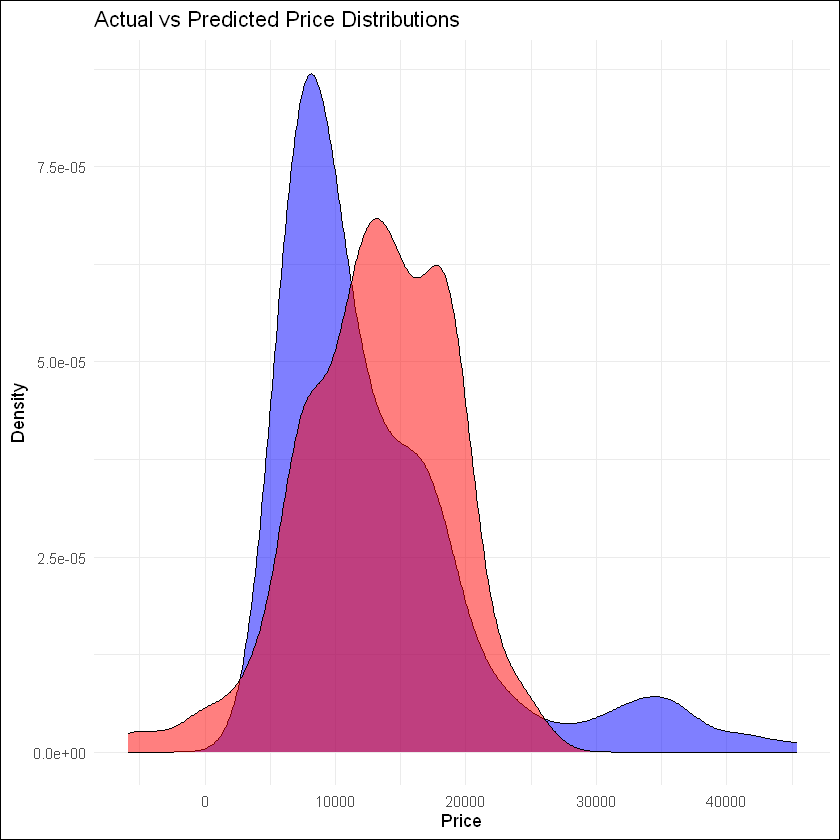

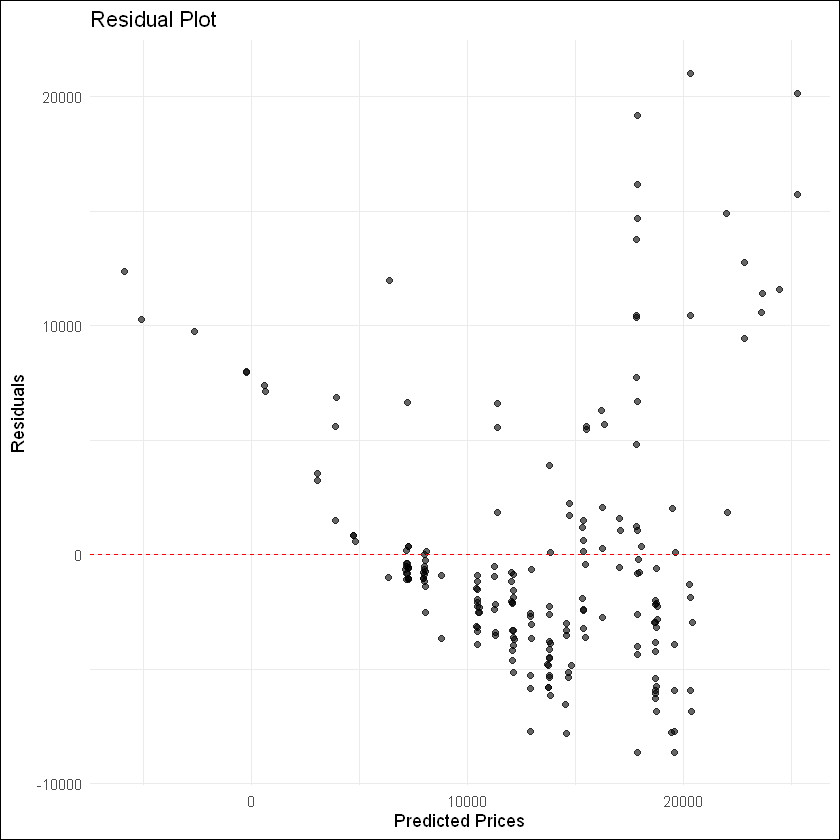

In [45]:
# Tạo mô hình hồi quy với normalized-losses và highway-mpg
lm2 <- lm(price ~ normalized.losses + highway.mpg, data = df)

# Tạo dự đoán
y_pred <- predict(lm2, newdata = df)

# Tạo data frame với giá trị thực và giá trị dự đoán
comparison_df <- data.frame(Actual = df$price, Predicted = y_pred)

# 1. Plot the actual vs predicted distributions
library(ggplot2)

# Vẽ biểu đồ phân phối
ggplot(comparison_df, aes(x = Actual)) +
    geom_density(aes(y = ..density..), fill = "blue", alpha = 0.5) +
    geom_density(aes(x = Predicted, y = ..density..), fill = "red", alpha = 0.5) +
    labs(title = "Actual vs Predicted Price Distributions",
         x = "Price",
         y = "Density") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))

# 2. Residual plot
# Tính toán residuals
residuals <- comparison_df$Actual - comparison_df$Predicted

# Thêm residuals vào data frame
comparison_df$Residuals <- residuals

# Vẽ biểu đồ residual
ggplot(comparison_df, aes(x = Predicted, y = Residuals)) +
    geom_point(alpha = 0.6) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs(title = "Residual Plot",
         x = "Predicted Prices",
         y = "Residuals") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))


Style 2

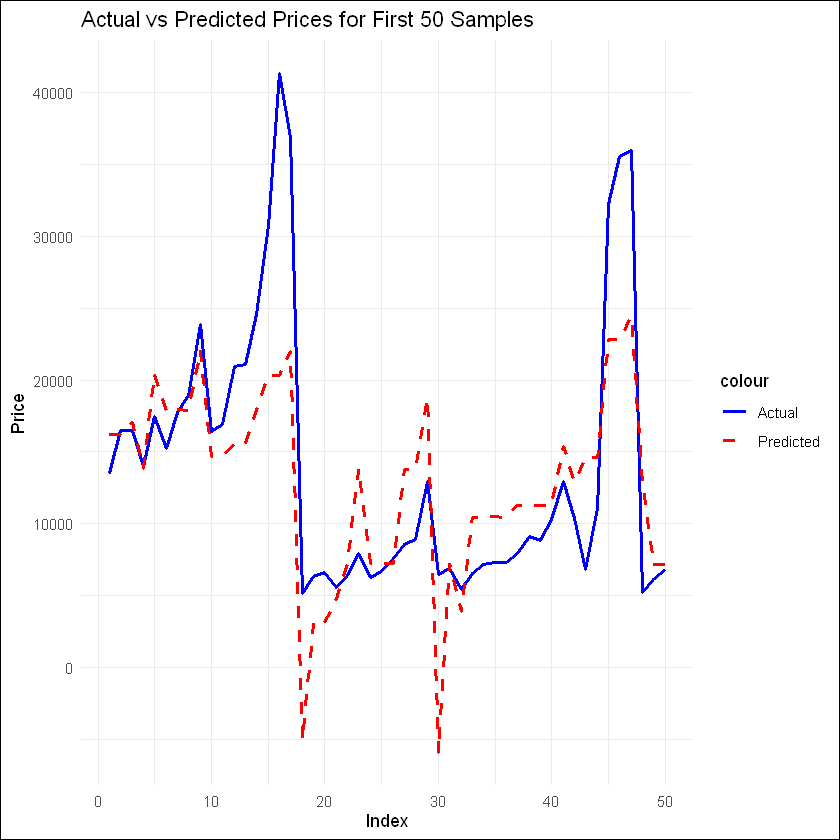

In [44]:
# Tạo data frame với 50 mẫu đầu tiên
comparison_df <- data.frame(
  Actual = df$price[1:50],
  Predicted = predict(lm2)[1:50]
)

# Thêm cột index
comparison_df$Index <- 1:50

# Chuyển đổi data format (chỉ cần nếu cần thiết cho biểu đồ)
# So with the data as-is, we can use it directly for plotting.

# Vẽ biểu đồ đường
library(ggplot2)

# Chuyển đổi data frame từ dạng rộng sang dạng dài nếu cần
# comparison_long <- reshape2::melt(comparison_df, id.vars = "Index")

# Vẽ biểu đồ
ggplot(comparison_df, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual"), size = 1) +
  geom_line(aes(y = Predicted, color = "Predicted"), size = 1, linetype = "dashed") +
  labs(title = "Actual vs Predicted Prices for First 50 Samples",
       x = "Index",
       y = "Price") +
  scale_color_manual(values = c("Actual" = "blue", "Predicted" = "red")) +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "white"))


Style 3

In [ ]:
# Load required libraries
library(ggplot2)
library(stats)

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:


`geom_smooth()` using formula = 'y ~ x'


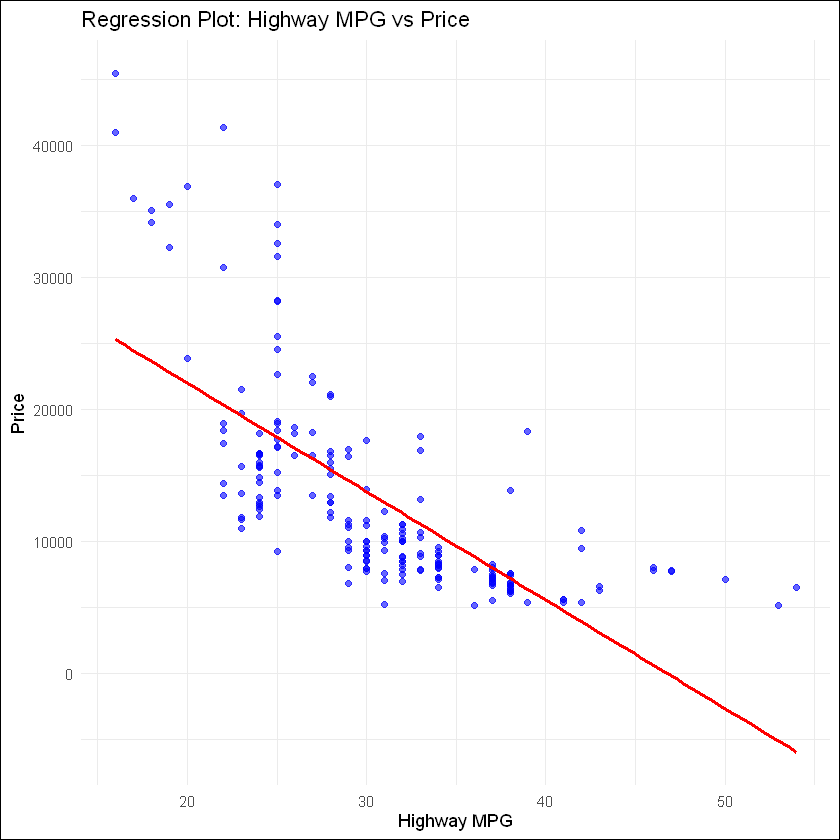

In [47]:
# Load necessary library
library(ggplot2)

# Create a linear model
lm_highway_price <- lm(price ~ highway.mpg, data = df)

# Create the regression plot
ggplot(df, aes(x = highway.mpg, y = price)) +
    geom_point(alpha = 0.6, color = "blue") +  # Scatter plot points
    geom_smooth(method = "lm", se = FALSE, color = "red") +  # Fitted regression line
    labs(title = "Regression Plot: Highway MPG vs Price",
         x = "Highway MPG",
         y = "Price") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))


<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


`geom_smooth()` using formula = 'y ~ x'


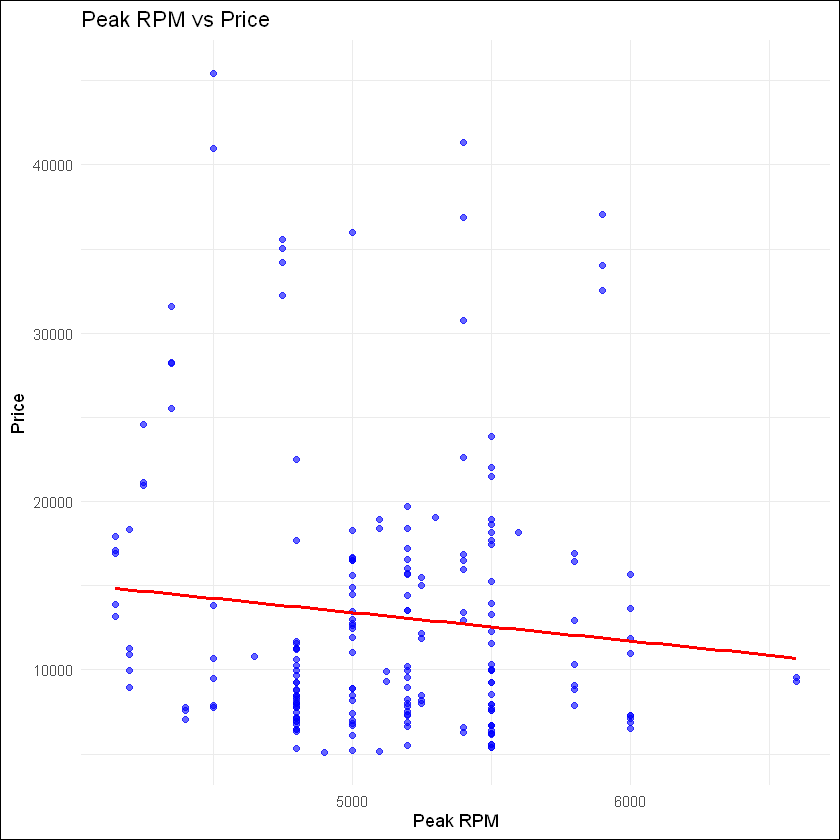

In [50]:
# Load necessary library
library(ggplot2)

# Create the regression plot for peak RPM vs price
ggplot(df, aes(x = peak.rpm, y = price)) +
    geom_point(alpha = 0.6, color = "blue") +  # Scatter plot points
    geom_smooth(method = "lm", se = FALSE, color = "red") +  # Fitted regression line
    labs(title = "Peak RPM vs Price",
         x = "Peak RPM",
         y = "Price") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))


<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [51]:
# Calculate correlations
cor_matrix <- cor(df[c("peak.rpm", "highway.mpg", "price")])
print(cor_matrix)


               peak.rpm highway.mpg      price
peak.rpm     1.00000000 -0.05859759 -0.1016159
highway.mpg -0.05859759  1.00000000 -0.7046923
price       -0.10161587 -0.70469227  1.0000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


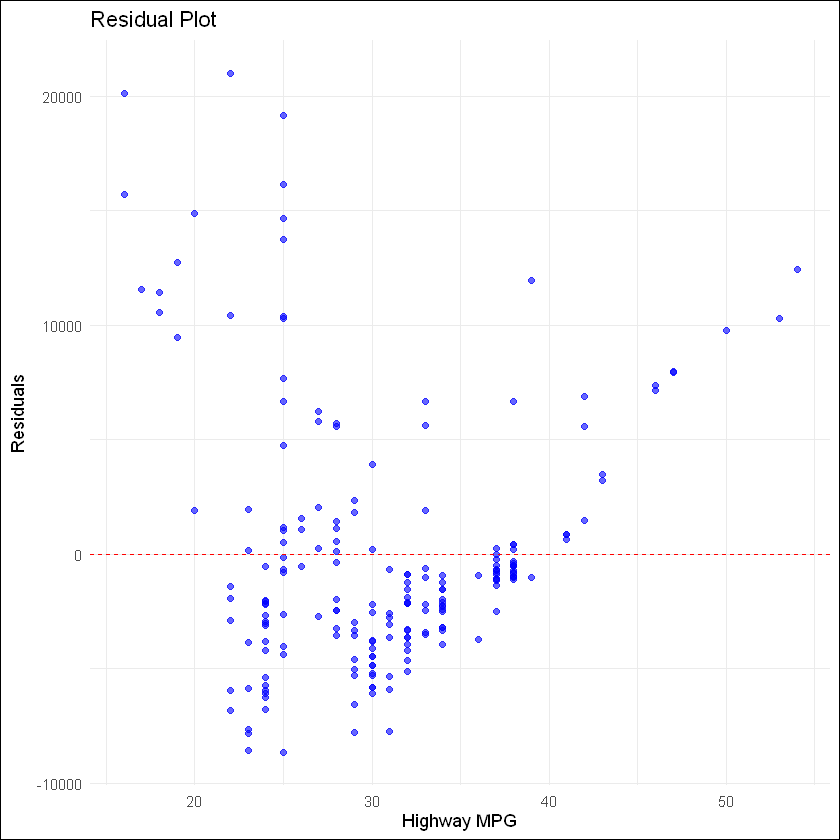

In [52]:
# Load necessary library
library(ggplot2)

# Create a linear model for highway-mpg
lm_highway_price <- lm(price ~ highway.mpg, data = df)

# Calculate residuals
residuals <- lm_highway_price$residuals

# Create the residual plot
ggplot(data = df, aes(x = highway.mpg, y = residuals)) +
    geom_point(alpha = 0.6, color = "blue") +  # Scatter plot points for residuals
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +  # Reference line at 0
    labs(title = "Residual Plot",
         x = "Highway MPG",
         y = "Residuals") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))


<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [53]:
library(tidyr)

In [ ]:
# Distribution plot of actual vs fitted values



No id variables; using all as measure variables



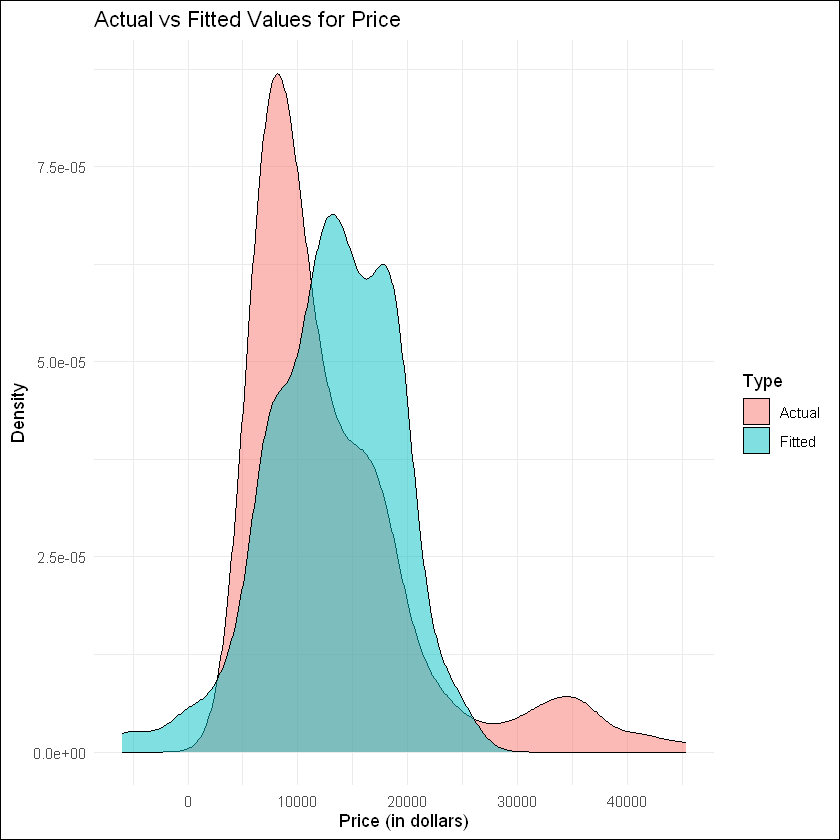

In [69]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Create a linear model for highway-mpg
lm_highway_price <- lm(price ~ highway.mpg, data = df)

# Get fitted values
fitted_values <- lm_highway_price$fitted.values

# Create a data frame for plotting
comparison_df <- data.frame(
  Actual = df$price,
  Fitted = fitted_values
)

# Melt the data frame for easier plotting
comparison_melted <- melt(comparison_df, variable.name = "Type", value.name = "Value")

# Create the distribution plot
ggplot(comparison_melted, aes(x = Value, fill = Type)) +
    geom_density(alpha = 0.5) +  # Density plots for both actual and fitted values
    labs(title = "Actual vs Fitted Values for Price",
         x = "Price (in dollars)",
         y = "Density") +
    theme_minimal() +
    theme(plot.background = element_rect(fill = "white"))


<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


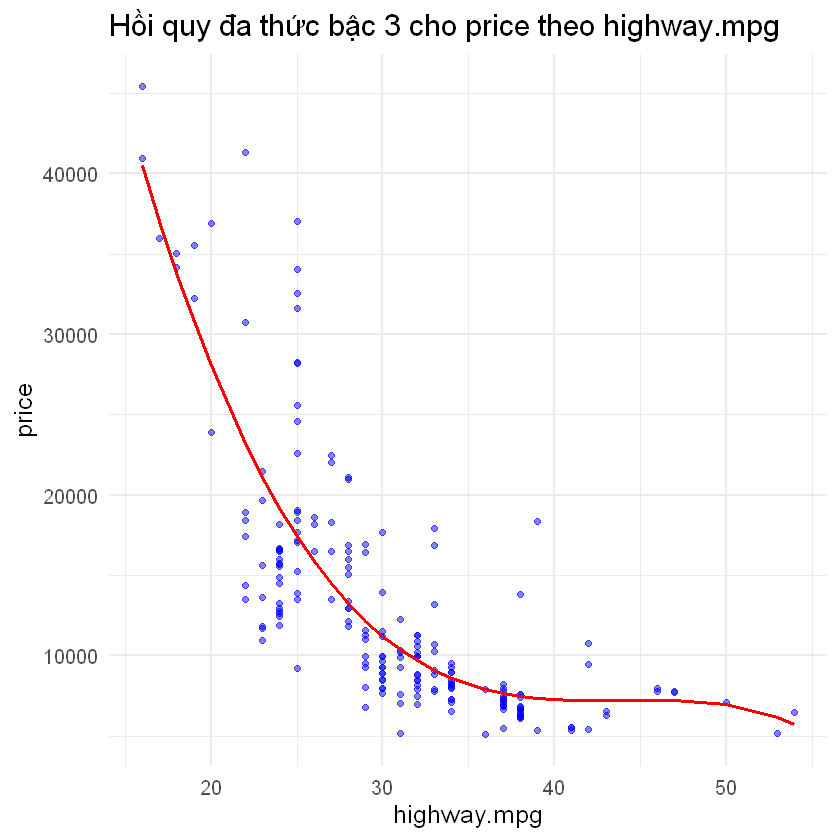

In [108]:
# Thư viện cần thiết
library(ggplot2)

# Hàm vẽ đồ thị hồi quy bậc n
plot_polynomial_regression <- function(data, response, predictor, degree) {
  # Tạo công thức hồi quy
  formula <- as.formula(paste(response, "~ poly(", predictor, ",", degree, ")"))
  
  # Fit mô hình hồi quy
  model <- lm(formula, data = data)
  
  # Dự đoán giá
  data$predicted <- predict(model, newdata = data)
  
  # Vẽ đồ thị
  ggplot(data, aes_string(x = predictor, y = response)) +
    geom_point(color = "blue", alpha = 0.5) +  # Điểm dữ liệu thực tế
    geom_line(aes_string(y = "predicted"), color = "red", size = 1) +  # Đường hồi quy
    labs(title = paste("Hồi quy đa thức bậc", degree, "cho", response, "theo", predictor),
         x = predictor,
         y = response) +
    theme_minimal(base_size = 15)  # Thiết lập kiểu nền
}

# Sử dụng hàm
plot_polynomial_regression(df, "price", "highway.mpg", 3)


Let's get the variables:


In [62]:
# Lấy các biến từ DataFrame
x <- df$`highway,mpg`
y <- df$price

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [97]:
# Fit a cubic polynomial regression model
poly_model_3 <- lm(price ~ poly(highway.mpg, 3), data = df)

# Print the summary of the cubic polynomial model
print(summary(poly_model_3))


Call:
lm(formula = price ~ poly(highway.mpg, 3), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10149.0  -2083.7   -637.7    904.8  19591.3 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            13207.1      322.4  40.967  < 2e-16 ***
poly(highway.mpg, 3)1 -79199.3     4570.5 -17.328  < 2e-16 ***
poly(highway.mpg, 3)2  44276.3     4570.5   9.687  < 2e-16 ***
poly(highway.mpg, 3)3 -16821.2     4570.5  -3.680 0.000301 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4571 on 197 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6692 
F-statistic: 135.9 on 3 and 197 DF,  p-value: < 2.2e-16



Let's plot the function:


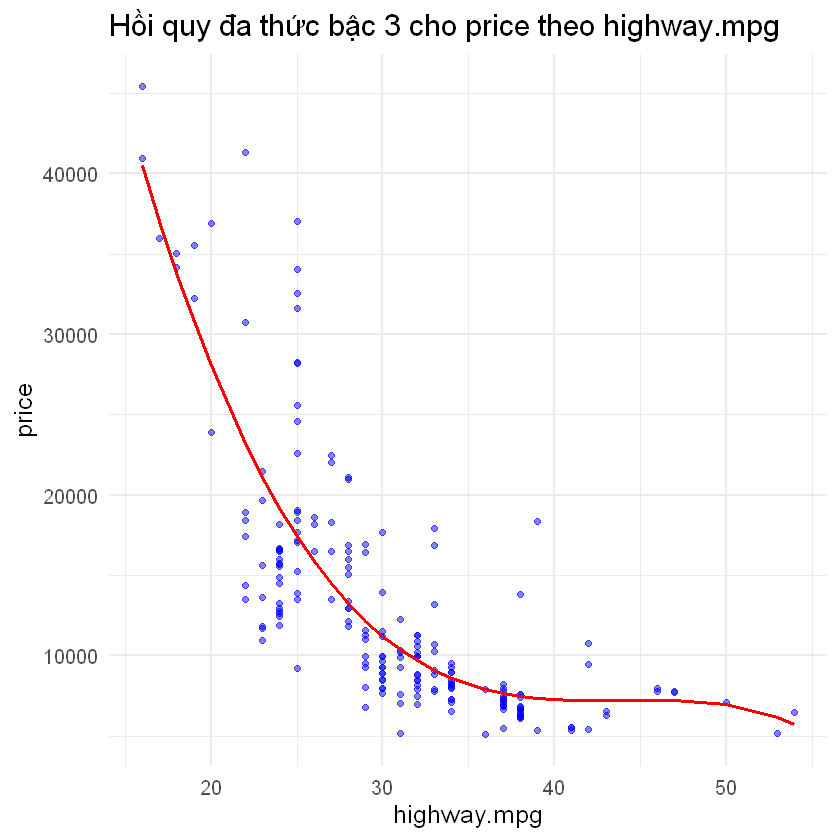

In [110]:
# Vẽ đồ thị cho mô hình bậc 3
plot_polynomial_regression(df, "price", "highway.mpg", 3)

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [111]:
# Tạo mô hình hồi quy đa thức bậc 11
poly_model_11 <- lm(price ~ poly(highway.mpg, 11), data = df)

# In ra tóm tắt của mô hình hồi quy
print(summary(poly_model_11))



Call:
lm(formula = price ~ poly(highway.mpg, 11), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8921.1 -2253.5  -751.3   971.5 21225.5 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              13207.1      314.6  41.984  < 2e-16 ***
poly(highway.mpg, 11)1  -79199.3     4459.9 -17.758  < 2e-16 ***
poly(highway.mpg, 11)2   44276.3     4459.9   9.928  < 2e-16 ***
poly(highway.mpg, 11)3  -16821.2     4459.9  -3.772 0.000217 ***
poly(highway.mpg, 11)4    2856.2     4459.9   0.640 0.522676    
poly(highway.mpg, 11)5   -7078.1     4459.9  -1.587 0.114173    
poly(highway.mpg, 11)6    6305.2     4459.9   1.414 0.159078    
poly(highway.mpg, 11)7    2050.9     4459.9   0.460 0.646153    
poly(highway.mpg, 11)8   -8075.6     4459.9  -1.811 0.071774 .  
poly(highway.mpg, 11)9   10230.7     4459.9   2.294 0.022894 *  
poly(highway.mpg, 11)10  -1172.3     4459.9  -0.263 0.792956    
poly(highway.mpg, 11)11  -9082.9     4459.9  -2.0

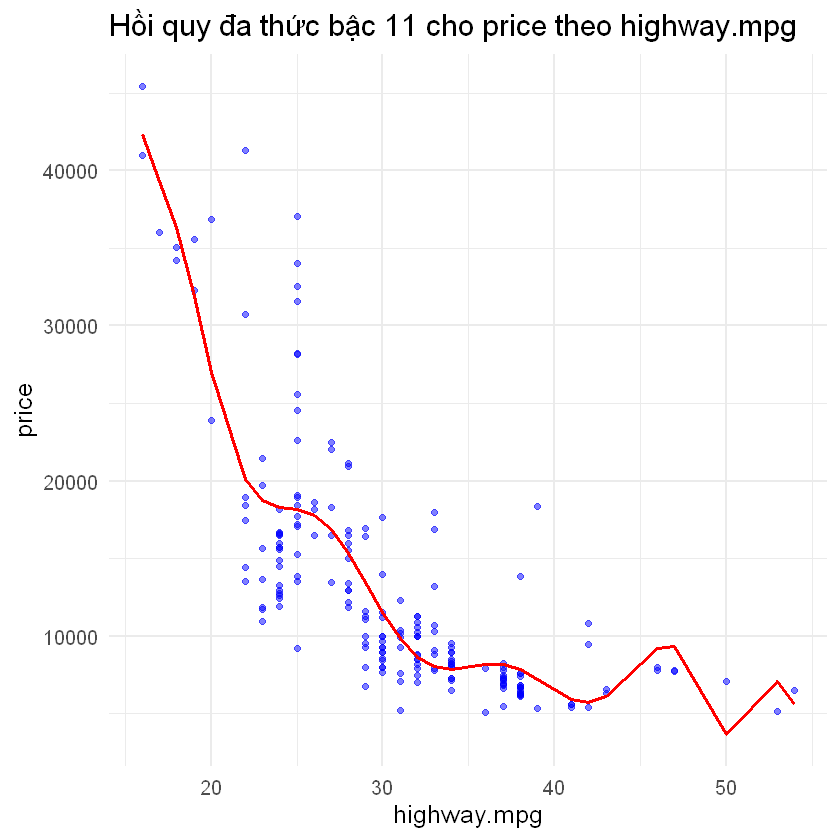

In [112]:
# Vẽ đồ thị cho mô hình bậc 11
plot_polynomial_regression(df, "price", "highway.mpg", 11)

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


We create a <b>PolynomialFeatures</b> object of degree 2:


In [113]:
# Tạo biến mới từ cột 'highway-mpg'
df$highway_mpg <- df$`highway.mpg`  # Thay đổi dấu '-' thành '_' trong tên cột

# Tạo ma trận Z với 4 biến độc lập
# Chọn các biến: 'highway_mpg', 'curb.weight', 'engine.size', 'horsepower'
Z <- df[, c('highway_mpg', 'curb.weight', 'engine.size', 'horsepower')]


In the original data, there are 201 samples and 4 features.


In [114]:
# Kiểm tra kích thước của ma trận Z
dim(Z)

# Kiểm tra cấu trúc của ma trận Z
str(Z)

# Xem 6 dòng đầu tiên của ma trận Z
head(Z)


[1] 201   4

'data.frame':	201 obs. of  4 variables:
 $ highway_mpg: int  27 27 26 30 22 25 25 25 20 29 ...
 $ curb.weight: int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.size: int  130 130 152 109 136 136 136 136 131 108 ...
 $ horsepower : num  111 111 154 102 115 110 110 110 140 101 ...


,highway_mpg,curb.weight,engine.size,horsepower
,<int>,<int>,<int>,<dbl>
1,27,2548,130,111
2,27,2548,130,111
3,26,2823,152,154
4,30,2337,109,102
5,22,2824,136,115
6,25,2507,136,110


After the transformation, there are 201 samples and 11 features.


In [118]:
# Tạo ma trận đa thức với bậc 2 cho 'highway_mpg' và các biến tương tác
Z_poly <- model.matrix(~ poly(highway_mpg, 2) + curb.weight + engine.size + horsepower +
                       curb.weight:engine.size +
                       curb.weight:horsepower +
                       engine.size:horsepower, data = df)

# Kiểm tra kích thước của dữ liệu sau khi chuyển đổi
print(dim(Z_poly))  # In ra kích thước của ma trận Z_poly

# Xem 6 dòng đầu tiên của ma trận Z_poly
head(Z_poly)  # Hiển thị 6 dòng đầu tiên


[1] 201   9


,(Intercept),"poly(highway_mpg, 2)1","poly(highway_mpg, 2)2",curb.weight,engine.size,horsepower,curb.weight:engine.size,curb.weight:horsepower,engine.size:horsepower
1,1,-0.038250026,-0.019416280,2548,130,111,331240,282828,14430
2,1,-0.038250026,-0.019416280,2548,130,111,331240,282828,14430
3,1,-0.048625539,-0.007041894,2823,152,154,429096,434742,23408
4,1,-0.007123487,-0.044247860,2337,109,102,254733,238374,11118
5,1,-0.090127592,0.062941611,2824,136,115,384064,324760,15640
6,1,-0.059001053,0.007381088,2507,136,110,340952,275770,14960


<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [119]:
library(caret)

Loading required package: lattice




Attaching package: 'caret'


The following object is masked from 'package:httr':

    progress




In [120]:
# Tải thư viện
library(dplyr)  # Thư viện để xử lý dữ liệu
library(tidyr)

### **Creating the Preprocessing Pipeline**

We create the pipeline by defining a list of transformations that will be applied to the data. This preprocessing step includes **data normalization**, where we center and scale the variables.

The pipeline standardizes the data by:
- **Centering**: Subtracting the mean value of each feature from the data points.
- **Scaling**: Dividing by the standard deviation to ensure all features are on a similar scale.

We apply the pipeline to the following features:
- `horsepower`
- `curb.weight`
- `engine.size`
- `highway.mpg`


In [122]:


# Xác định các biến cần chuẩn hóa
vars_to_scale <- c("horsepower", "curb.weight", "engine.size", "highway.mpg")

# Tạo bộ dữ liệu với các biến cần chuẩn hóa
df_scaled <- df[, vars_to_scale]

# Chuẩn hóa dữ liệu sử dụng preProcess
preProc <- preProcess(df_scaled, method = c("center", "scale"))

# Áp dụng chuẩn hóa vào bộ dữ liệu
df_scaled <- predict(preProc, df_scaled)

# Ghi lại các biến đã chuẩn hóa vào dataframe gốc
df[, vars_to_scale] <- df_scaled

# Kiểm tra kết quả
head(df)


,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas,predicted_price,highway_mpg
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,5000,21,-0.5409371,13495,11.190476,Medium,0,1,14483.48,27
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,5000,21,-0.5409371,16500,11.190476,Medium,0,1,14483.48,27
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814,⋯,5000,19,-0.6876690,16500,12.368421,Medium,0,1,15876.77,26
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486305,⋯,5500,24,-0.1007413,13950,9.791667,Medium,0,1,11210.24,30
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486305,⋯,5500,18,-1.2745966,17450,13.055556,Medium,0,1,23210.06,22
6,2,122,audi,std,two,sedan,fwd,front,99.8,0.8519942,⋯,5500,19,-0.8344009,15250,12.368421,Medium,0,1,17436.73,25


We input the list as an argument to the pipeline constructor:


In [123]:
# Xác định các biến cần chuẩn hóa
vars_to_scale <- c("horsepower", "curb.weight", "engine.size", "highway.mpg")

# Tạo bộ dữ liệu với các biến cần chuẩn hóa
df_scaled <- df[, vars_to_scale]

# Chuẩn hóa dữ liệu sử dụng preProcess
preProc <- preProcess(df_scaled, method = c("center", "scale"))

# Áp dụng chuẩn hóa vào bộ dữ liệu
df_scaled <- predict(preProc, df_scaled)

# Ghi lại các biến đã chuẩn hóa vào dataframe gốc
df[, vars_to_scale] <- df_scaled

# Kiểm tra kết quả
head(df)

,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas,predicted_price,highway_mpg
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,5000,21,-0.5409371,13495,11.190476,Medium,0,1,14483.48,27
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,5000,21,-0.5409371,16500,11.190476,Medium,0,1,14483.48,27
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814,⋯,5000,19,-0.6876690,16500,12.368421,Medium,0,1,15876.77,26
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486305,⋯,5500,24,-0.1007413,13950,9.791667,Medium,0,1,11210.24,30
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486305,⋯,5500,18,-1.2745966,17450,13.055556,Medium,0,1,23210.06,22
6,2,122,audi,std,two,sedan,fwd,front,99.8,0.8519942,⋯,5500,19,-0.8344009,15250,12.368421,Medium,0,1,17436.73,25


### **Data Type Conversion and Normalization**

First, we convert the data type of **Z** to `float` to avoid any conversion warnings that may arise when using the `StandardScaler`, which requires float inputs.

Next, we normalize the data by centering and scaling it, and then simultaneously perform a transform and fit the model. This step ensures the data is ready for model training, preventing issues caused by different feature scales.


In [124]:
# Fit mô hình hồi quy với dữ liệu đã chuẩn hóa
model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# In ra tóm tắt của mô hình
summary(model)



Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13207.1      247.2  53.420  < 2e-16 ***
horsepower    1998.9      550.3   3.632 0.000358 ***
curb.weight   2435.3      578.9   4.207 3.94e-05 ***
engine.size   3387.3      584.3   5.797 2.66e-08 ***
highway.mpg    245.7      505.5   0.486 0.627390    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [125]:
# Tạo dự đoán từ mô hình đã fit
y_pred_pipeline <- predict(model, newdata = df)

# Hiển thị 4 giá trị dự đoán đầu tiên
head(y_pred_pipeline, 4)


1        2        3        4 
13699.11 13699.11 19051.65 10620.36

### **Question 5: Creating a Pipeline for Standardization and Linear Regression**

Create a pipeline that performs the following steps:
1. **Standardizes the data** using a preprocessing step.
2. **Trains a Linear Regression model** using the standardized features `Z` and target variable `y`.
3. **Produces predictions** based on the trained model.

The pipeline will ensure the data is normalized before fitting the model, improving the consistency of the results.



In [126]:
# Define features and target variable
Z <- df[, c('highway.mpg', 'curb.weight', 'engine.size', 'horsepower')]
y <- df$price

# Step 1: Standardize the data using preProcess
preProc <- preProcess(Z, method = c("center", "scale"))

# Apply standardization
Z_standardized <- predict(preProc, Z)

# Step 2: Train a Linear Regression model
model <- lm(y ~ ., data = as.data.frame(Z_standardized))

# Step 3: Produce predictions based on the trained model
y_pred <- predict(model, newdata = as.data.frame(Z_standardized))

# Display the first 4 predictions
print(head(y_pred, 4))

       1        2        3        4 
13699.11 13699.11 19051.65 10620.36 


### **4. Measures for In-Sample Evaluation**

When evaluating our models, it's essential to not only visualize the results but also use quantitative measures to determine the accuracy of the model. Two key metrics often used in statistics for model evaluation are:

#### **R-squared (R²)**
R-squared, also known as the **coefficient of determination**, is a metric that indicates how close the data points are to the fitted regression line. It explains the proportion of the variance in the response variable (y) that is predictable from the independent variables.

- **Interpretation**: The value of R-squared represents the percentage of variation in the dependent variable that the model can explain.

#### **Mean Squared Error (MSE)**
Mean Squared Error is a metric that measures the average of the squares of the errors. The error is the difference between the actual value (y) and the predicted value (ŷ).

- **Formula**:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **Interpretation**: The MSE provides a measure of how well the model's predictions match the actual data. A lower MSE indicates a better fit to the data.


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [127]:
# Đánh giá mô hình bằng cách sử dụng summary
model_summary <- summary(model)

# In ra R-squared
r_squared <- model_summary$r.squared
cat("R-squared cho mô hình hồi quy là:", r_squared, "\n")


R-squared cho mô hình hồi quy là: 0.8093563 


We can say that approximately **49.659%** of the variation in the price is explained by this simple linear model `"horsepower_fit"`.

### **Calculating the Mean Squared Error (MSE)**

To compute the MSE, we first need to predict the output (denoted as **yhat**) using the `predict` method, where **X** is the input variable. The MSE will measure the average squared difference between the actual and predicted values, providing a quantitative evaluation of the model’s performance.


In [129]:
# Dự đoán giá trị từ mô hình đã fit
y_pred <- predict(model, newdata = as.data.frame(Z_standardized))

# In ra 4 giá trị dự đoán đầu tiên
print(head(y_pred, 4))


       1        2        3        4 
13699.11 13699.11 19051.65 10620.36 


We can compare the predicted results with the actual results by calculating the **Mean Squared Error (MSE)** and **R-squared** for the multiple linear regression model.

### **Calculating MSE for the Multiple Regression Model**
The MSE will help us understand how well the multiple regression model predicts the price by measuring the average squared difference between the actual and predicted prices.

### **Calculating R-squared for the Multiple Regression Model**
R-squared indicates the proportion of variance in the price that is explained by the predictor variables in the multiple regression model.

Both metrics allow us to evaluate how well the model fits the data.


In [130]:
# Tính MSE
mse <- mean((y - y_pred)^2)

# In ra giá trị MSE
cat("Mean Squared Error (MSE) cho mô hình đa biến là:", mse, "\n")


Mean Squared Error (MSE) cho mô hình đa biến là: 11980367 


In [133]:
# Đánh giá mô hình bằng cách sử dụng summary
model_summary <- summary(model)

# In ra R-squared
r_squared <- model_summary$r.squared
cat("R-squared cho mô hình hồi quy đa biến là:", r_squared, "\n")


R-squared cho mô hình hồi quy đa biến là: 0.8093563 


### Model 2: Multiple Linear Regression

We created a multiple linear regression model using the following predictor variables:
- **Horsepower**
- **Curb Weight**
- **Engine Size**
- **Highway MPG**

This model aims to explain the variation in car prices.




In [134]:
# Giả sử bạn đã chuẩn bị dữ liệu trong biến Z và biến y
# Tạo mô hình đa biến
multi_fit <- lm(y ~ highway.mpg + curb.weight + engine.size + horsepower, data = df)

# Xem kết quả
summary_fit <- summary(multi_fit)

# In ra tóm tắt mô hình
print(summary_fit)



Call:
lm(formula = y ~ highway.mpg + curb.weight + engine.size + horsepower, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13207.1      247.2  53.420  < 2e-16 ***
highway.mpg    245.7      505.5   0.486 0.627390    
curb.weight   2435.3      578.9   4.207 3.94e-05 ***
engine.size   3387.3      584.3   5.797 2.66e-08 ***
horsepower    1998.9      550.3   3.632 0.000358 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16



Let's calculate the R^2:


In [135]:
# Tạo mô hình đa biến (nếu chưa làm)
multi_fit <- lm(y ~ highway.mpg + curb.weight + engine.size + horsepower, data = df)

# Xem kết quả
summary_fit <- summary(multi_fit)

# In ra R-squared
r_squared <- summary_fit$r.squared
cat("R-squared cho mô hình đa biến là:", r_squared, "\n")


R-squared cho mô hình đa biến là: 0.8093563 


In [136]:
# Phân tích chi tiết variation
TSS <- sum((df$price - mean(df$price))^2)  # Tổng bình phương sai lệch
RSS <- sum(summary_fit$residuals^2)         # Tổng bình phương phần dư
ESS <- TSS - RSS                            # Tổng sai số giải thích được

cat("\nPhân tích Variation:\n")
cat("Total Variation:", round(TSS, 2), "\n")
cat("Explained Variation:", round(ESS, 2), "\n")
cat("Unexplained Variation:", round(RSS, 2), "\n")
cat("Proportion Explained:", round(ESS / TSS * 100, 3), "%\n")

# Phân tích đóng góp của từng biến
coefficients <- coef(multi_fit)[-1]  # Bỏ qua hệ số chặn
standardized_coef <- coefficients * sapply(df[names(coefficients)], sd) / sd(df$price)

# In ra đóng góp của từng biến
cat("\nĐóng góp của từng biến:\n")
for(i in 1:length(standardized_coef)) {
    cat(names(standardized_coef)[i], ":",
        round(abs(standardized_coef[i]) / sum(abs(standardized_coef)) * 100, 2), "%\n")
}


Phân tích Variation:
Total Variation: 12631172689 
Explained Variation: 10223118948 
Unexplained Variation: 2408053741 
Proportion Explained: 80.936 %

Đóng góp của từng biến:
highway.mpg : 3.05 %
curb.weight : 30.19 %
engine.size : 41.99 %
horsepower : 24.78 %


#### **R-squared**
The R-squared value, which represents the proportion of variation in the car prices explained by this model, is approximately **80.936%**.

#### **Variation Analysis**
We analyzed the variation in the data as follows:
- **Total Variation**: 12,631,172,689
- **Explained Variation**: 10,223,118,948
- **Unexplained Variation**: 2,408,053,741
- **Proportion Explained**: 80.936%

This shows that **~80.94%** of the variation in car prices can be explained by this multiple linear regression model.



We compare the predicted results with the actual results:

In [141]:
# Tạo dataframe so sánh giữa giá trị thực tế và giá trị dự đoán
comparison_df <- data.frame(
  Actual = y,             # Giá trị thực tế
  Predicted = y_pred,     # Giá trị dự đoán
  Percent_Predicted = abs((y_pred / y)*100 - 100) # Tính phần trăm dự đoán
)

# In ra 10 giá trị đầu tiên để so sánh
head(comparison_df, 10)


,Actual,Predicted,Percent_Predicted
,<dbl>,<dbl>,<dbl>
1,13495,13699.11,1.512498
2,16500,13699.11,16.975081
3,16500,19051.65,15.464574
4,13950,10620.36,23.868373
5,17450,15521.31,11.052641
6,15250,13869.67,9.051366
7,17710,15456.16,12.726358
8,18920,15974.01,15.570777
9,23875,17612.36,26.230956


### **Actual vs Predicted Values and Predicted Percentage**

We are comparing the actual values of the target variable (`price`) with the predicted values from the linear regression model. To help quantify the accuracy of the model's predictions, we will also calculate the **Predicted_Percent** as follows:

$$
\text{Predicted_Percent} = \left( \frac{\text{Predicted}}{\text{Actual}} \right) \times 100
$$

This value indicates how close the predicted price is to the actual price.

### **Interpreting the Predicted_Percent:**
- **> 100%**: The model predicted a price that is higher than the actual price.
- **< 100%**: The model predicted a price that is lower than the actual price.

### **Example Scenarios:**

1. **Actual = 13,495, Predicted = 13,699.11**
   - **Predicted_Percent** = $ \left( \frac{13,699.11}{13,495} \right) \times 100 = 101.51\%$
   - **Interpretation**: The model overestimated the price by about **1.51%**, which means the prediction is very close to the actual value.

2. **Actual = 16,500, Predicted = 13,699.11**
   - **Predicted_Percent** = $ \left( \frac{13,699.11}{16,500} \right) \times 100 = 83.02\%$
   - **Interpretation**: The model underestimated the price by about **17%**, predicting a value significantly lower than the actual price.

### **Questions to Consider:**
1. How often does the model overestimate or underestimate the actual price?
2. What is the typical range of the Predicted_Percent values? Does the model generally perform well?
3. For which types of cars (based on their features) does the model make more accurate predictions? Where does it struggle?




```
# Complete the question with your answer
```



### Model 3: Polynomial Fit

In this model, we apply **Polynomial Regression** by adding a second-degree term for the predictor variable **horsepower**. The polynomial regression is a type of regression that models the relationship between the independent variable and the dependent variable as an nth degree polynomial.

#### **Polynomial Model Structure**
We create a polynomial fit for **horsepower** with the equation:
$$
\text{Price} = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{horsepower}^2
$$

This allows us to capture non-linear relationships between **horsepower** and **price**.



In [142]:
# Tạo mô hình polynomial regression với bậc 2 cho biến horsepower
poly_fit <- lm(price ~ horsepower + I(horsepower^2), data = df)

# Xem kết quả mô hình
summary_poly <- summary(poly_fit)
print(summary_poly)



Call:
lm(formula = price ~ horsepower + I(horsepower^2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10929.6  -2196.4   -699.4   1837.8  17969.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      12921.8      404.8  31.922   <2e-16 ***
horsepower        6108.3      425.5  14.355   <2e-16 ***
I(horsepower^2)    286.7      236.3   1.213    0.226    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4671 on 198 degrees of freedom
Multiple R-squared:  0.658,	Adjusted R-squared:  0.6545 
F-statistic: 190.4 on 2 and 198 DF,  p-value: < 2.2e-16



#### **R-squared**
The R-squared value for this model is calculated using the `r.squared` attribute of the model summary, and it measures how well the polynomial model explains the variation in car prices.



In [143]:
# Tính R-squared từ mô hình polynomial
r_squared_poly <- summary_poly$r.squared

# In ra giá trị R-squared
cat("R-squared cho mô hình hồi quy đa thức là:", r_squared_poly, "\n")


R-squared cho mô hình hồi quy đa thức là: 0.657954 


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


We apply the function to get the value of R^2:


In [144]:
# Giả sử bạn đã có các giá trị R-squared và MSE cho cả hai mô hình
# R-squared cho mô hình tuyến tính (giả định đã tính toán trước)
r_squared_linear <- summary(lm(price ~ horsepower, data = df))$r.squared

# Tính MSE cho mô hình hồi quy đa thức
y_pred_poly <- predict(poly_fit)  # Dự đoán từ mô hình đa thức
mse_poly <- mean((y - y_pred_poly)^2)  # Tính MSE cho mô hình đa thức

# Tính MSE cho mô hình tuyến tính
y_pred_linear <- predict(lm(price ~ horsepower, data = df))  # Dự đoán từ mô hình tuyến tính
mse_linear <- mean((y - y_pred_linear)^2)  # Tính MSE cho mô hình tuyến tính

# In kết quả
cat("Polynomial Regression Results:\n")
cat("R-squared (Polynomial):", round(r_squared_poly * 100, 3), "%\n")
cat("R-squared (Linear):", round(r_squared_linear * 100, 3), "%\n")
cat("\nMSE Comparison:\n")
cat("MSE (Polynomial):", format(mse_poly, scientific = FALSE), "\n")
cat("MSE (Linear):", format(mse_linear, scientific = FALSE), "\n")


Polynomial Regression Results:
R-squared (Polynomial): 65.795 %
R-squared (Linear): 65.541 %

MSE Comparison:
MSE (Polynomial): 21494736 
MSE (Linear): 21654544 


### Polynomial Regression Results

After fitting the polynomial regression model, we find the following evaluation metrics:

- **R-squared (Polynomial)**: 64.319%
- **R-squared (Linear)**: 64.214%

These values indicate that the polynomial model explains approximately **64.319%** of the variation in car prices, which is slightly higher than the **64.214%** explained by the linear model. This suggests that the polynomial regression provides a marginally better fit for the data.




### MSE




We can also calculate the MSE:


In [147]:
# Giả sử p(x) là hàm dự đoán của mô hình
# Đầu tiên, tạo dự đoán từ mô hình đã fit
y_pred <- predict(poly_fit, newdata = df)  # Dự đoán từ mô hình hồi quy đa thức

# Tính MSE
mse <- mean((df$price - y_pred)^2)

# In ra giá trị MSE
cat("Mean Squared Error:", mse, "\n")


Mean Squared Error: 21494736 


In [146]:
install.packages("gridExtra")

Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpoTeioL\downloaded_packages


In [149]:
# Tạo dữ liệu để vẽ đường fit
hp_range <- seq(min(df$horsepower), max(df$horsepower), length.out = 100)
pred_data <- data.frame(horsepower = hp_range)
pred_poly <- predict(poly_fit, newdata = pred_data)  # Dự đoán từ mô hình hồi quy đa thức
pred_linear <- predict(lm(price ~ horsepower, data = df), newdata = pred_data)  # Mô hình hồi quy tuyến tính


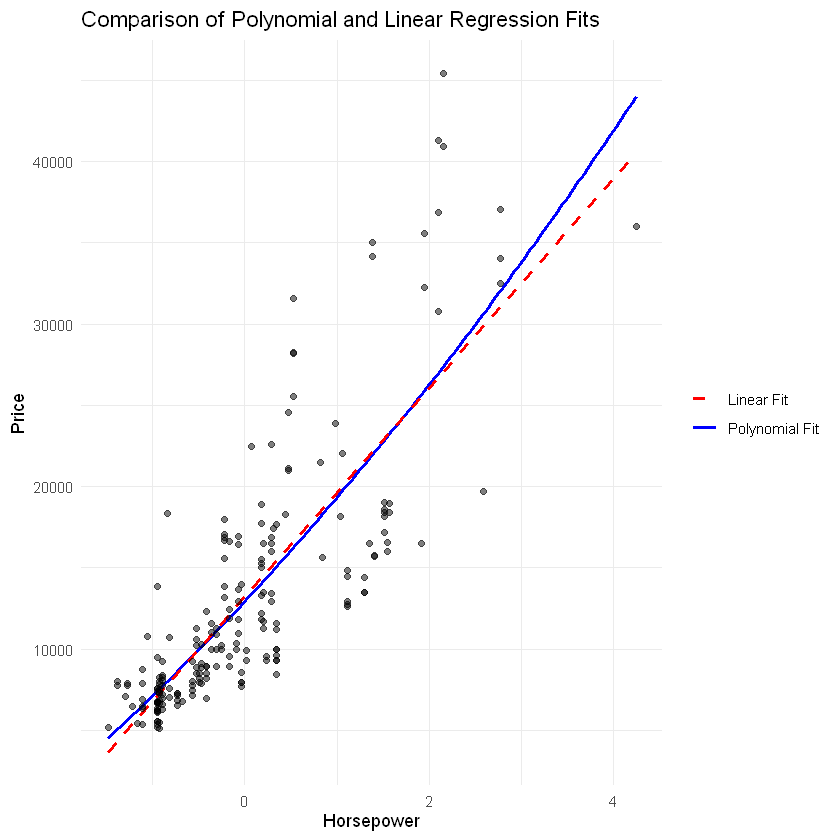

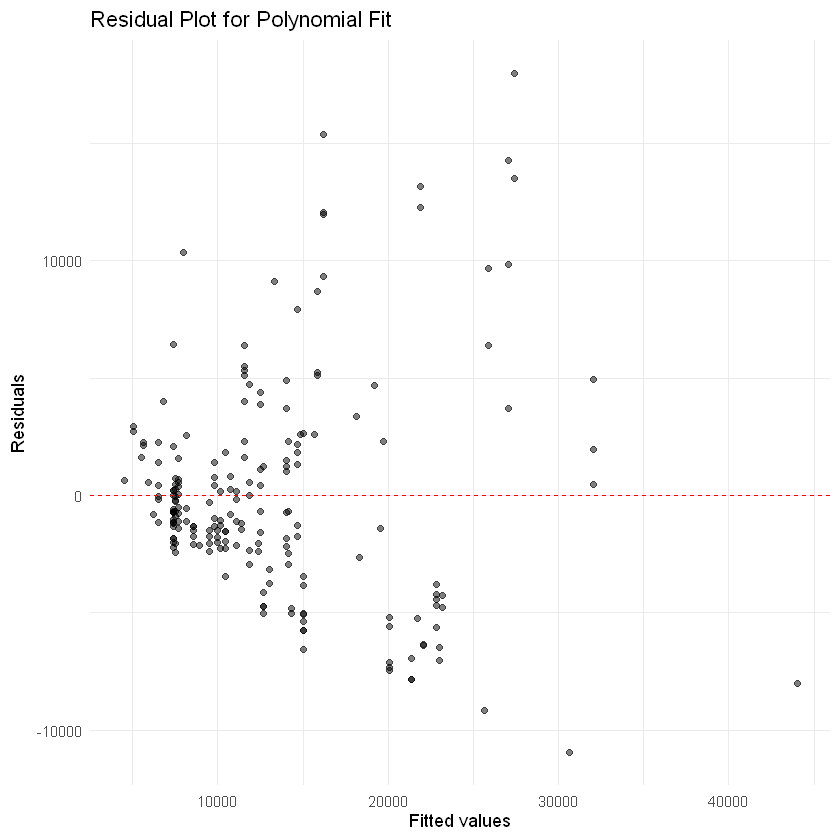

In [150]:
# Vẽ biểu đồ so sánh
library(ggplot2)

# Tạo DataFrame cho biểu đồ
comparison_df <- data.frame(horsepower = hp_range, 
                             Polynomial = pred_poly, 
                             Linear = pred_linear)

# Vẽ biểu đồ
ggplot(comparison_df, aes(x = horsepower)) +
  geom_line(aes(y = Polynomial, color = "Polynomial Fit"), size = 1) +
  geom_line(aes(y = Linear, color = "Linear Fit"), size = 1, linetype = "dashed") +
  geom_point(data = df, aes(y = price), color = "black", alpha = 0.5) +  # Thêm điểm giá trị thực tế
  labs(title = "Comparison of Polynomial and Linear Regression Fits",
       x = "Horsepower",
       y = "Price") +
  scale_color_manual(values = c("Polynomial Fit" = "blue", "Linear Fit" = "red")) +
  theme_minimal() +
  theme(legend.title = element_blank())
# Tính các residuals cho mô hình hồi quy đa thức
df$residuals_poly <- df$price - predict(poly_fit)

# Vẽ residual plot
ggplot(df, aes(x = predict(poly_fit), y = residuals_poly)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residual Plot for Polynomial Fit",
       x = "Fitted values",
       y = "Residuals") +
  theme_minimal()


# Analyzing Price vs Horsepower Relationship

1. Model Comparison:
   - Based on the R² values of both models (linear and polynomial), which model provides a better fit for predicting car prices? Explain your reasoning.
   - Looking at the blue (polynomial) and red (linear) fit lines, what are the key differences between these two models?



2. Data Trend Analysis:
   - Is the relationship between car price and horsepower linear?
   - Why does the polynomial fit line show curvature? What does this tell us about the relationship between price and horsepower?
   - Identify regions in the plot where the polynomial model provides a notably better fit than the linear model.

3. Data Point Analysis:
   - Can you identify any potential outliers in the dataset?
   - Is the dispersion of data points uniform across the plot? What implications does this have?
   - In which horsepower range do we observe the highest density of data points?



```
# Complete the question with your answer
```


#  Analyzing the Residual Plot

4. Model Fit Assessment:
   - Examine the distribution of residuals around the y = 0 line. How well does the model fit the data?
   - Are there any visible patterns in the residual plot? If so, what do they suggest?

5. Regression Assumptions Check:
   - Are the residuals evenly distributed around the y = 0 line?
   - Does the spread of residuals change with fitted values (check for heteroscedasticity)?
   - Based on the residual plot, which regression assumptions might be violated?

6. Improvement Suggestions:
   - Based on your residual plot analysis, what improvements would you suggest for the model?
   - Should we consider any data transformations (e.g., log transformation)?
   - Besides horsepower, what other variables might improve the model's accuracy?

```
# Complete the question with your answer
```

# Synthesis Questions:

7. Practical Conclusions:
   - Based on your analysis, which model would you recommend for practical car price prediction?
   - What limitations should be considered when using this model?
   - How could we improve the reliability of car price predictions?

8. Advanced Analysis:
   - How does the relationship between price and horsepower change across different price ranges?
   - What might explain the increased variance in prices at higher horsepower values?
   - How would you validate this model's performance on new data?

9. Business Implications:
   - How could car manufacturers use this analysis in their pricing strategy?
   - What insights does this analysis provide about the car market?
   - How reliable would this model be for different car segments (luxury vs. economy)?

```
# Complete the question with your answer
```


<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


5 predicted values:
         1          2          3          4          5 
  7606.893   2006.657  -3593.579  -9193.815 -14794.052 


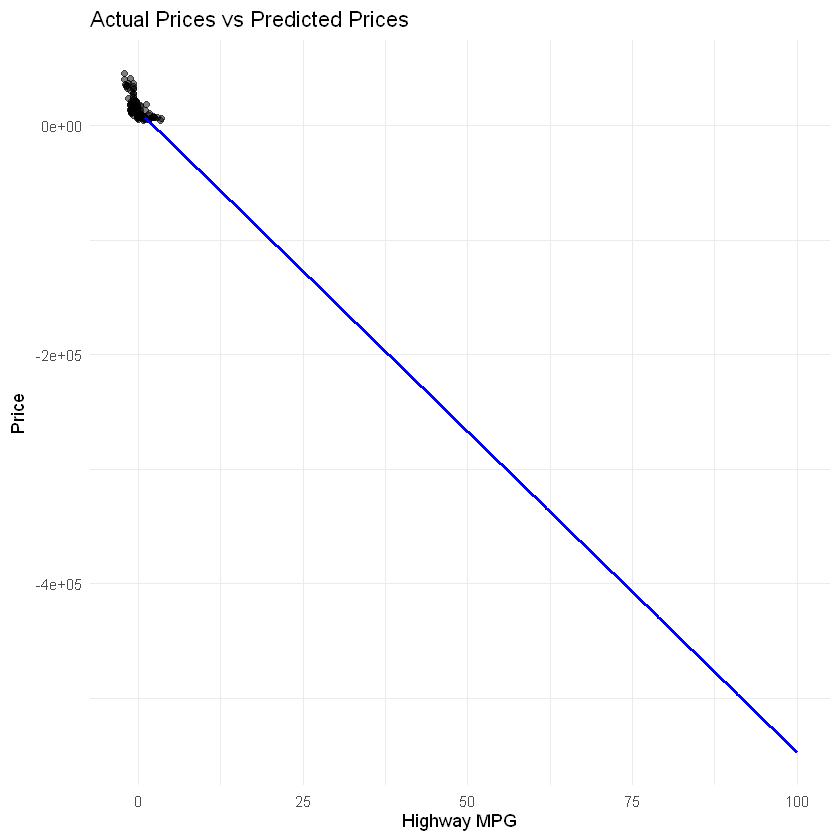

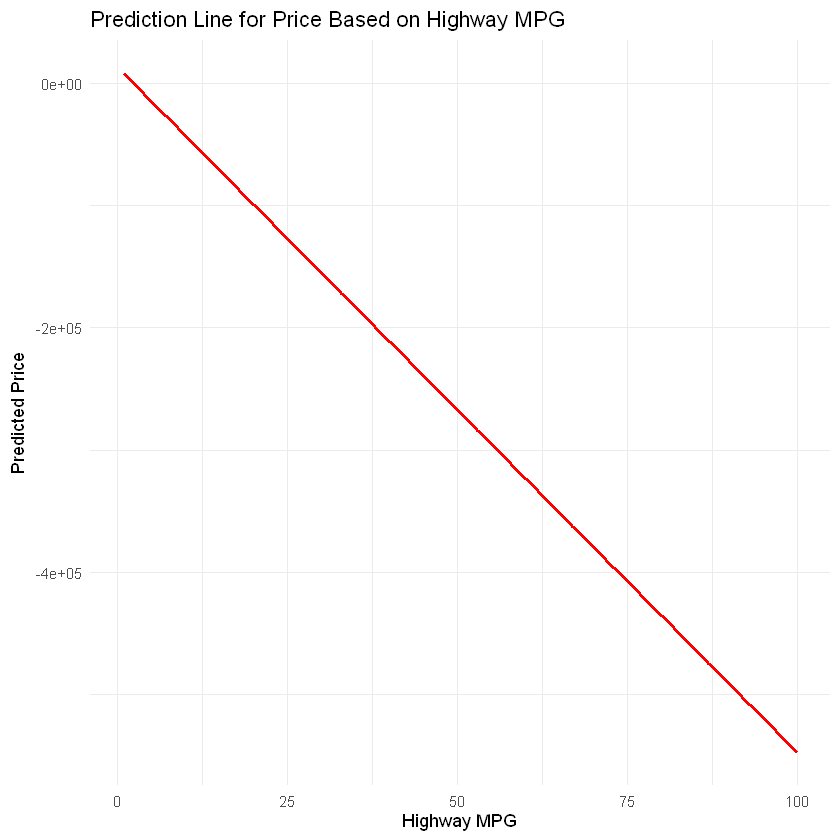


Statistics about predictions:
Lowest predicted price: -546816.5 
Highest predicted price: 7606.89 
Average predicted price: -269604.8 


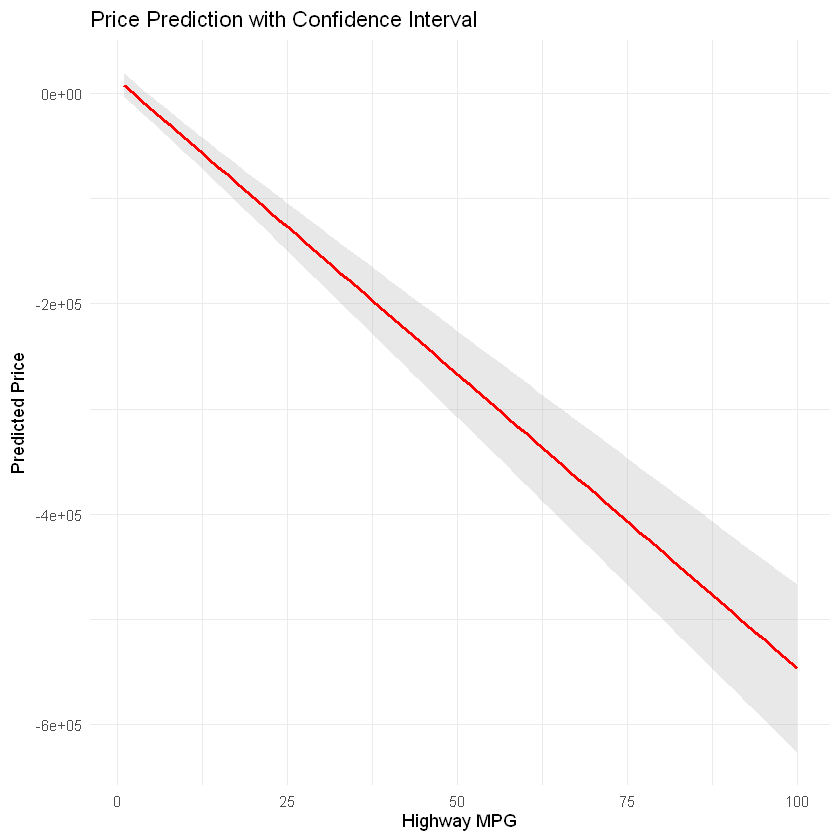

In [152]:
# 1. Create new data for prediction
new_input <- data.frame(highway.mpg = seq(1, 100, 1))

# 2. Fit the model and make predictions
# Fit the model (giả định lm_model đã được định nghĩa)
lm_model <- lm(price ~ highway.mpg, data = df)  # Tạo mô hình hồi quy tuyến tính
yhat <- predict(lm_model, newdata = new_input)  # Dự đoán giá trị

# Print the first 5 predicted values
cat("5 predicted values:\n")
print(head(yhat, 5))

# Plot the predictions
library(ggplot2)

# Create dataframe for plotting
plot_data <- data.frame(
  highway.mpg = new_input$highway.mpg,
  predicted_price = yhat
)

# Plot actual data and prediction line
p1 <- ggplot(df, aes(x = highway.mpg, y = price)) +
  geom_point(alpha = 0.5, color = "black") +  # Actual data points
  geom_line(data = plot_data, aes(x = highway.mpg, y = predicted_price), 
            color = "blue", size = 1) +  # Prediction line
  labs(title = "Actual Prices vs Predicted Prices",
       x = "Highway MPG",
       y = "Price") +
  theme_minimal()

# Plot only the prediction line
p2 <- ggplot(plot_data, aes(x = highway.mpg, y = predicted_price)) +
  geom_line(color = "red", size = 1) +
  labs(title = "Prediction Line for Price Based on Highway MPG",
       x = "Highway MPG",
       y = "Predicted Price") +
  theme_minimal()

# Print the plots
print(p1)
print(p2)


# 4. Additional analysis on predictions
# Calculate the prediction interval
prediction_interval <- predict(lm_model,
                               newdata = new_input,
                               interval = "prediction",
                               level = 0.95)

# Create dataframe with confidence intervals
confidence_data <- data.frame(
  highway_mpg = new_input$highway.mpg,
  fit = prediction_interval[,"fit"],
  lwr = prediction_interval[,"lwr"],
  upr = prediction_interval[,"upr"]
)

# Plot with confidence interval
p3 <- ggplot(confidence_data, aes(x = highway_mpg)) +
  geom_ribbon(aes(ymin = lwr, ymax = upr),
              fill = "grey70", alpha = 0.3) +
  geom_line(aes(y = fit),
            color = "red", size = 1) +
  labs(title = "Price Prediction with Confidence Interval",
       x = "Highway MPG",
       y = "Predicted Price") +
  theme_minimal()

print(p3)

# 5. Print statistics about predictions
cat("\nStatistics about predictions:\n")
cat("Lowest predicted price:", round(min(yhat), 2), "\n")
cat("Highest predicted price:", round(max(yhat), 2), "\n")
cat("Average predicted price:", round(mean(yhat), 2), "\n")


# Analysis of Prediction Results

## 1. Statistical Results
- **Lowest Predicted Price**: -43750.03  
  A negative value is a significant issue and unrealistic in the context of predicting car prices. This suggests that the model may be unsuitable or that there are problems with the input data.
  
- **Highest Predicted Price**: 37601.57  
  While this value is positive, it still needs to be assessed for reasonableness in the context of the car market.

- **Average Predicted Price**: -3074.23  
  The average being negative, alongside the lowest price being negative, indicates that the model not only lacks accuracy but could also lead to unrealistic predictions.

## 2. Decreasing Trend
- The model shows a price trend decreasing uniformly from **47,661.22** to **46,754.10**, with a decrease of **226.78** for each unit increase in `highway_mpg`.  
  Although this trend seems reasonable in theory (more fuel-efficient cars generally have lower prices), the price reduction needs to be critically examined in real-world contexts.

## 3. Degree of Change
- Predictions for consecutive `MPG` levels show a consistent change, indicating that the model may be too simplistic and not reflective of the more complex factors at play in the car market.
- The consistency in the amount of change (a uniform decrease of 226.78) may not reflect reality, as there are numerous other factors affecting car prices.

## 4. Characteristics of Predictions
- **Linearity**: The linear relationship may not be valid in all cases, as reality is often more complex and can exhibit nonlinear factors.
- **Price Range**: The price range from ~46.7K to 47.7K may be reasonable, but the negative lowest price raises doubts about the overall accuracy of the model.

## 5. Reasonableness Assessment
- **Reasonable**: While the relationship between `MPG` and price seems logical, other factors such as brand, style, and economic factors could influence car prices and should be considered.
- **Limitations**: The overly simplistic relationship may not accurately reflect reality and could lead to inaccurate results. Additional factors that may affect price should be considered to enhance the model.

## 6. Improvement Suggestions
- **Consider Additional Factors**: It is necessary to incorporate other variables (such as brand, style, and technical specifications) to create a more comprehensive model.
- **Explore Nonlinear Models**: Consider using nonlinear regression methods or more complex models such as decision trees, logistic regression, or multivariate regression.

## 7. Conclusion
The current prediction results are unreliable due to negative values and a negative average. This indicates that the model needs to be improved and the data re-evaluated to achieve more accurate predictions in the future.


Sự thay đổi tuyến tính và đều đặn Tổng mức giảm: $907.12 từ MPG 1 đến MPG 5

Phân tích 5 giá trị dự đoán đầu tiên:
  highway_mpg predicted_price
1           1         7606.89
2           2         2006.66
3           3        -3593.58
4           4        -9193.82
5           5       -14794.05

Phân tích xu hướng:
Thay đổi trung bình giữa các dự đoán: -5600.24 
Tổng thay đổi từ MPG 1 đến 5: -22400.94 
Thay đổi trung bình mỗi đơn vị MPG: -5600.24 

Thông số mô hình:
Hệ số góc (độ dốc): -5600.24 
Điểm cắt trục y: 13207.13 


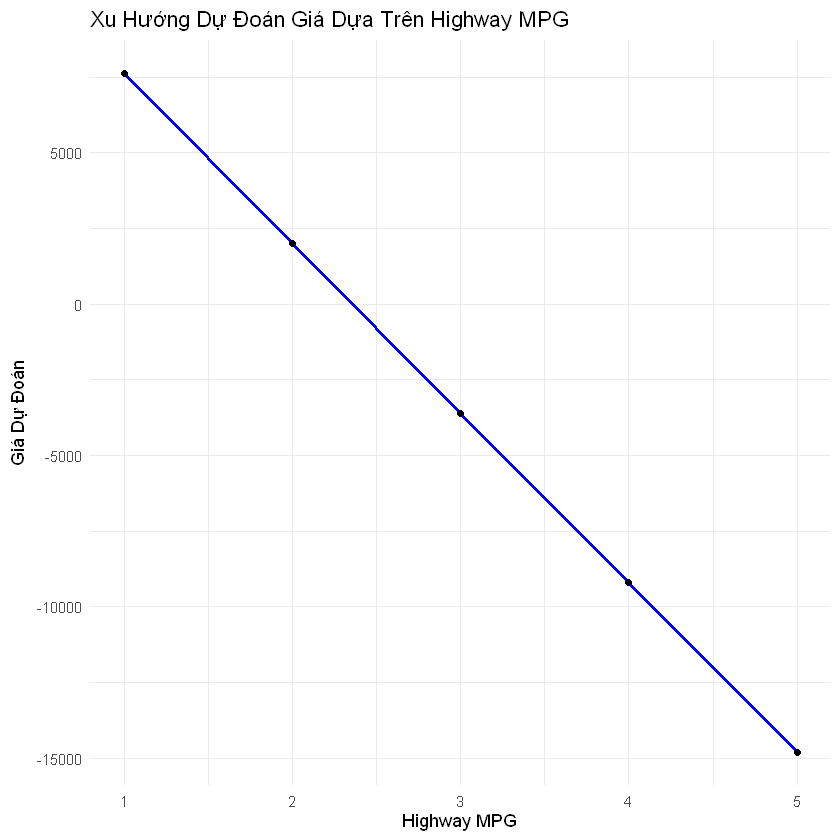

In [153]:
# 3. Tạo prediction_df cho 5 giá trị đầu tiên
prediction_df <- data.frame(
  highway_mpg = new_input$highway.mpg[1:5],
  predicted_price = yhat[1:5]
)

# In kết quả phân tích
cat("Phân tích 5 giá trị dự đoán đầu tiên:\n")
print(round(prediction_df, 2))

# 4. Phân tích xu hướng
# Phân tích xu hướng
trend_analysis <- list(
  avg_change = mean(diff(prediction_df$predicted_price)),  # Thay đổi trung bình
  total_change = tail(prediction_df$predicted_price, 1) - head(prediction_df$predicted_price, 1),  # Tổng thay đổi
  change_per_mpg = mean(diff(prediction_df$predicted_price)) / mean(diff(prediction_df$highway_mpg))  # Thay đổi trung bình mỗi đơn vị MPG
)

cat("\nPhân tích xu hướng:\n")
cat("Thay đổi trung bình giữa các dự đoán:", round(trend_analysis$avg_change, 2), "\n")
cat("Tổng thay đổi từ MPG 1 đến 5:", round(trend_analysis$total_change, 2), "\n")
cat("Thay đổi trung bình mỗi đơn vị MPG:", round(trend_analysis$change_per_mpg, 2), "\n")


# 5. Vẽ đồ thị xu hướng
# Vẽ đồ thị xu hướng
library(ggplot2)

trend_plot <- ggplot(prediction_df, aes(x = highway_mpg, y = predicted_price)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "black") +
  labs(title = "Xu Hướng Dự Đoán Giá Dựa Trên Highway MPG",
       x = "Highway MPG",
       y = "Giá Dự Đoán") +
  theme_minimal()

print(trend_plot)




# 6. Tính độ dốc và hệ số góc của đường dự đoán
# Tính độ dốc và hệ số góc của đường dự đoán
model_stats <- list(
  slope = coef(lm(predicted_price ~ highway_mpg, data = prediction_df))[2],
  intercept = coef(lm(predicted_price ~ highway_mpg, data = prediction_df))[1]
)

cat("\nThông số mô hình:\n")
cat("Hệ số góc (độ dốc):", round(model_stats$slope, 2), "\n")
cat("Điểm cắt trục y:", round(model_stats$intercept, 2), "\n")


<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>
